# GRACE Data Check

Some of the GRACE data looks suspicious, let's dive into it and check.

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import xarray as xr
import rioxarray
import rasterio as rio
import pandas as pd
import geopandas as gpd

import matplotlib.dates as mdates

from tqdm.autonotebook import tqdm

import sys
sys.path.append('../../')
import ndrought.wrangle as wrangle
import ndrought.compare as compare
import ndrought.plotting as ndplot

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/tmp/ipykernel_3319485/1988245056.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dm_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures'
grace = xr.open_dataset(f'{dm_path}/grace/WA/grace_usdmcat_WA.nc')

In [3]:
grace

<xarray.Dataset>
Dimensions:      (lat: 29, lon: 63, time: 409)
Coordinates:
  * lat          (lat) float64 45.56 45.69 45.81 45.94 ... 48.81 48.94 49.06
  * lon          (lon) float64 -124.7 -124.6 -124.4 ... -117.2 -117.1 -116.9
  * time         (time) datetime64[ns] 2014-01-13 2014-01-20 ... 2021-11-08
Data variables:
    spatial_ref  int64 ...
    GRACEsfsm    (time, lat, lon) float64 ...
    GRACErtzsm   (time, lat, lon) float64 ...
    GRACEgws     (time, lat, lon) float64 ...
Attributes:
    author:       a. stein, 7/28/2022
    description:  GRACE soil moisture gathered from various time windows, (sp...
    clipping:     Clipped to Washington state using http://eric.clst.org/asse...

In [18]:
grace['GRACEsfsm']

<xarray.DataArray 'GRACEsfsm' (time: 409, lat: 29, lon: 63)>
[747243 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 45.56 45.69 45.81 45.94 ... 48.69 48.81 48.94 49.06
  * lon      (lon) float64 -124.7 -124.6 -124.4 -124.3 ... -117.2 -117.1 -116.9
  * time     (time) datetime64[ns] 2014-01-13 2014-01-20 ... 2021-11-08
Attributes:
    description:    Percentiles of GRACE-Based percentiles of surface soil mo...
    long_name:      GRACEsfsm
    standard_name:  GRACEsfsm
    units:          %
    _ChunkSizes:    [224 464]
    Clipping:       original data was clipped to Washington using http://eric...
    grid_mapping:   spatial_ref

## Make some snapshots

In [4]:
cmap = ndplot.usdm_cmap()

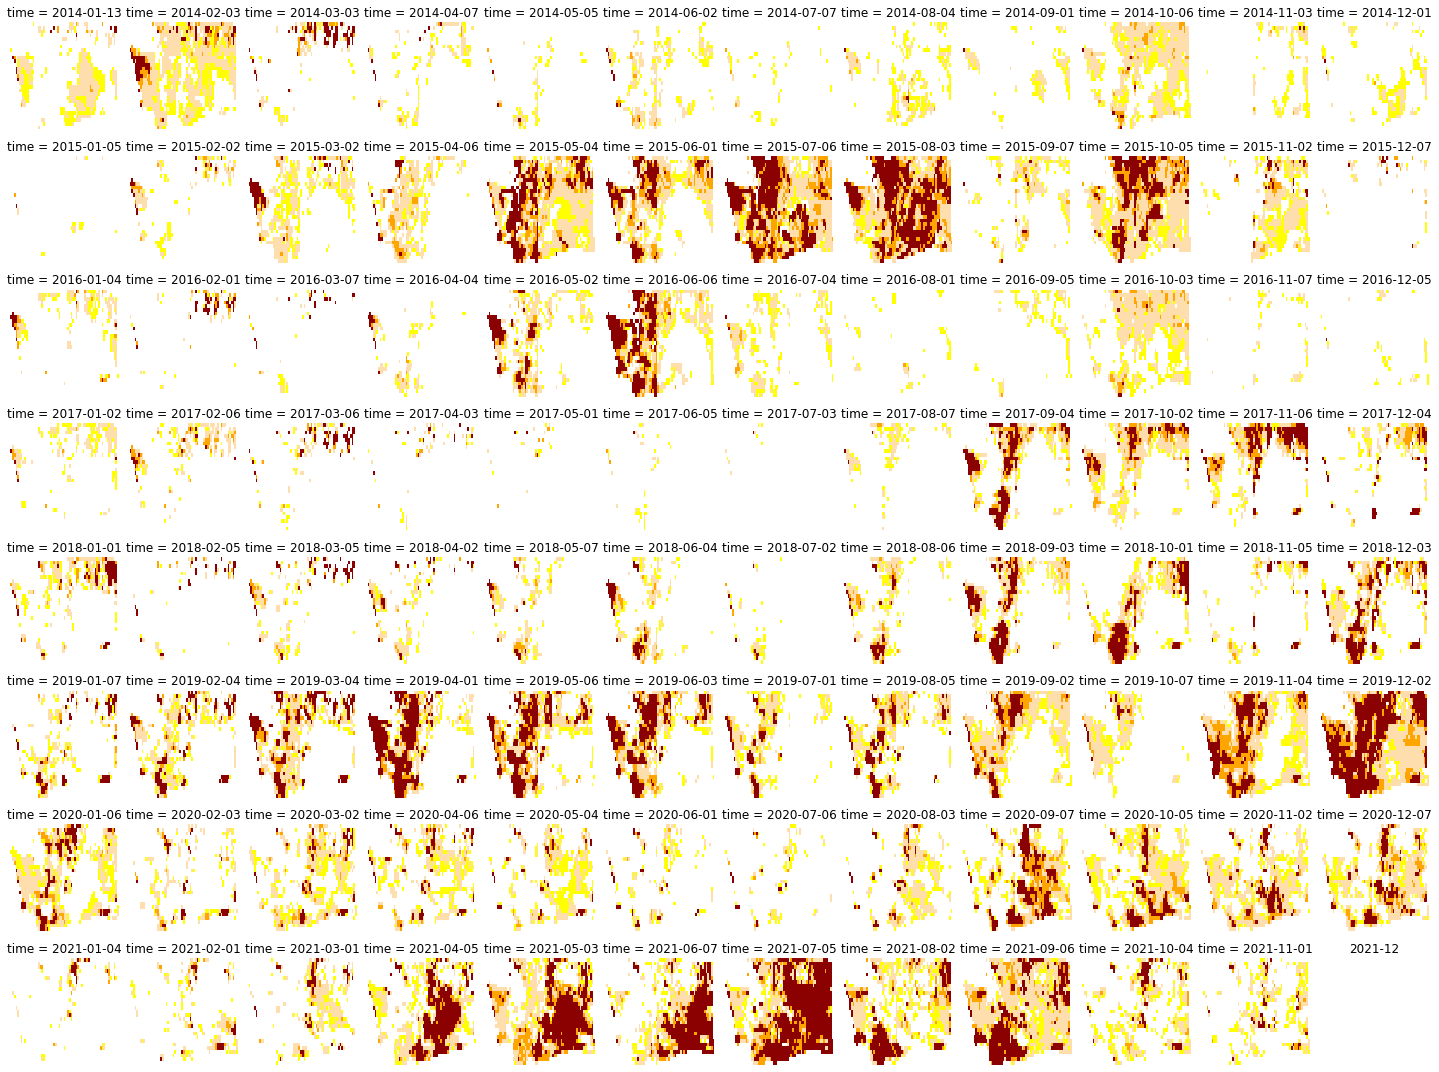

In [5]:
years = np.arange(2014, 2022, 1)
months = np.arange(1, 13, 1)

fig, axs = plt.subplots(8, 12, figsize=(20, 15))

for i, year in enumerate(years):
    for j, month in enumerate(months):
        try:
            axs[i,j].set_title(f'{year}-{month}')
            grace['GRACEsfsm'].sel(time=f'{year}-{month}').isel(time=0).plot(ax=axs[i,j], add_colorbar=False, vmin=-1, vmax=4, cmap=cmap)
            #axs[i,j].set_aspect('equal')
        except:
            pass

        axs[i,j].axis('off')

plt.tight_layout()

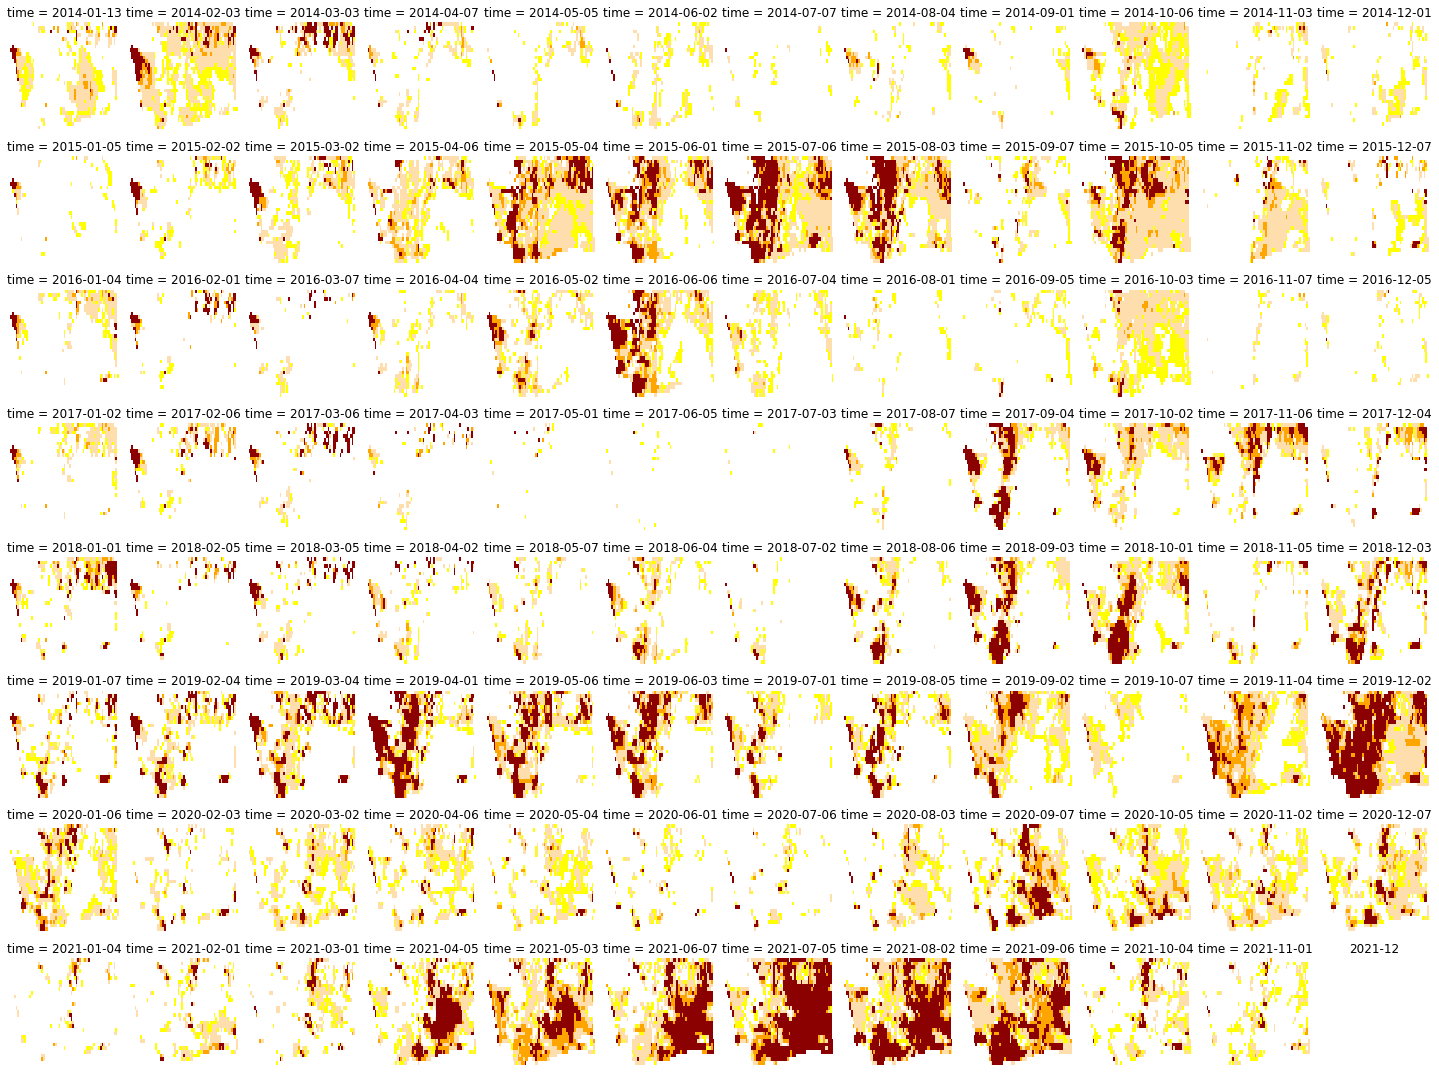

In [6]:
years = np.arange(2014, 2022, 1)
months = np.arange(1, 13, 1)

fig, axs = plt.subplots(8, 12, figsize=(20, 15))

for i, year in enumerate(years):
    for j, month in enumerate(months):
        try:
            axs[i,j].set_title(f'{year}-{month}')
            grace['GRACErtzsm'].sel(time=f'{year}-{month}').isel(time=0).plot(ax=axs[i,j], add_colorbar=False, vmin=-1, vmax=4, cmap=cmap)
            #axs[i,j].set_aspect('equal')
        except:
            pass

        axs[i,j].axis('off')

plt.tight_layout()

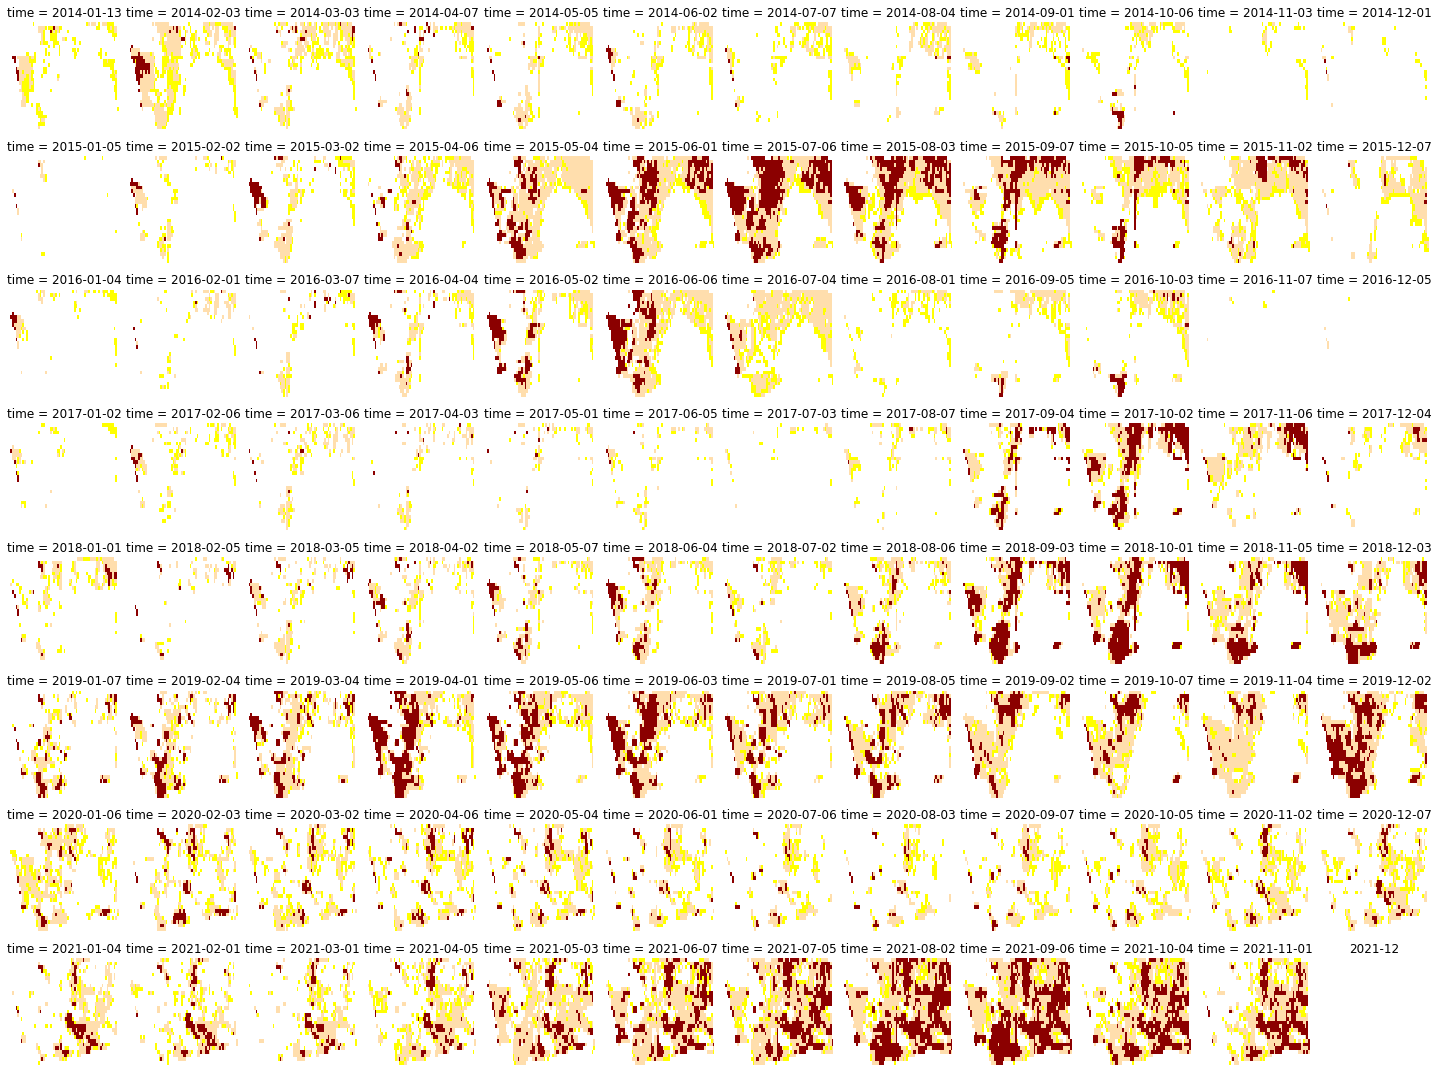

In [7]:
years = np.arange(2014, 2022, 1)
months = np.arange(1, 13, 1)

fig, axs = plt.subplots(8, 12, figsize=(20, 15))

for i, year in enumerate(years):
    for j, month in enumerate(months):
        try:
            axs[i,j].set_title(f'{year}-{month}')
            grace['GRACEgws'].sel(time=f'{year}-{month}').isel(time=0).plot(ax=axs[i,j], add_colorbar=False, vmin=-1, vmax=4, cmap=cmap)
            #axs[i,j].set_aspect('equal')
        except:
            pass

        axs[i,j].axis('off')

plt.tight_layout()

So it's not upside down ... but it looks pretty course?

## Distributions

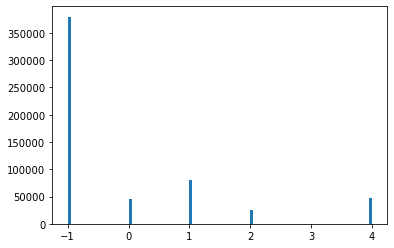

In [7]:
plt.hist(grace['GRACEsfsm'].values.ravel(), bins=100);

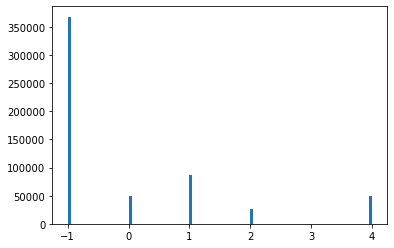

In [8]:
plt.hist(grace['GRACErtzsm'].values.ravel(), bins=100);

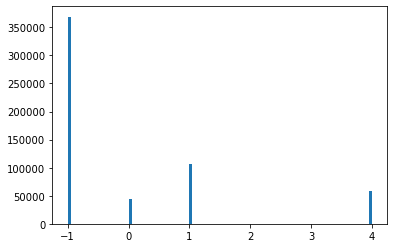

In [9]:
plt.hist(grace['GRACEgws'].values.ravel(), bins=100);

Huh. it's never in D3 but jumps to D4 ... let's check it before categorizing, wondering if the course distribution is throwing it off

In [11]:
grace_us = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/grace/grace.nc')
grace_us

<xarray.Dataset>
Dimensions:     (lat: 224, lon: 464, time: 409)
Coordinates:
  * lat         (lat) float64 25.06 25.19 25.31 25.44 ... 52.69 52.81 52.94
  * lon         (lon) float64 -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * time        (time) datetime64[ns] 2014-01-13 2014-01-20 ... 2021-11-08
Data variables:
    GRACEsfsm   (time, lat, lon) float64 ...
    GRACErtzsm  (time, lat, lon) float64 ...
    GRACEgws    (time, lat, lon) float64 ...

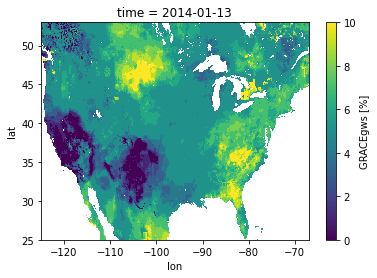

In [12]:
grace_us['GRACEgws'].isel(time=0).plot()

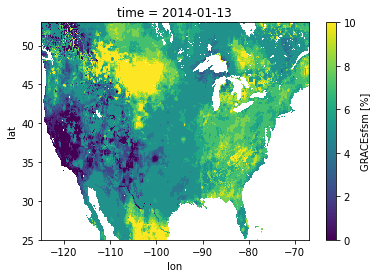

In [20]:
grace_us['GRACEsfsm'].isel(time=0).plot()

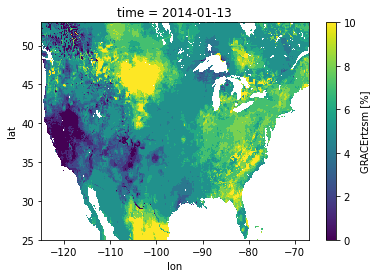

In [21]:
grace_us['GRACErtzsm'].isel(time=0).plot()

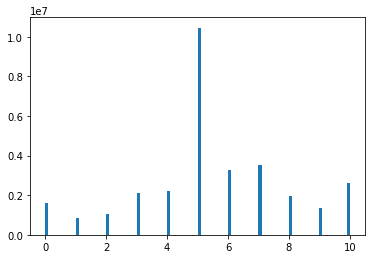

In [15]:
plt.hist(grace_us['GRACEgws'].values.ravel(), bins=100);

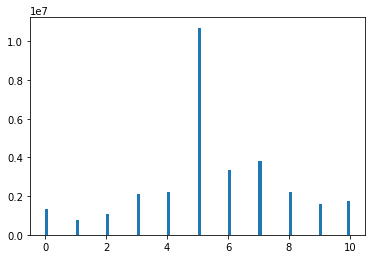

In [16]:
plt.hist(grace_us['GRACEsfsm'].values.ravel(), bins=100);

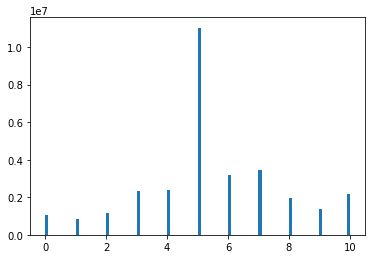

In [17]:
plt.hist(grace_us['GRACErtzsm'].values.ravel(), bins=100);

Ah. So they're integer values. Let's double check that how we're categorizing makes sense

Looking up the data, these are percentiles ... which I'm betting if I multiply by 10 then I get what percentage they are (to get from 0 to 100).

So ...
- 4+ --> -1
- 3 --> 0
- 2 --> 1
- 1, 0 --> 2, 3, 4

I think it'd be helpful to get actually finer data if possible cause the coarseness of this is not very helpful.